In [12]:
import json
import pandas as pd
import scdata
import matplotlib.pyplot as plt

SCDATA_FILE = '../scdata.json'

In [8]:
with open(SCDATA_FILE) as f:
    scdata_meta = json.load(f)
    
print(f'Loaded {len(scdata_meta)} tracks')

df = pd.DataFrame(scdata_meta.values())
df['normalized_genre'] = df['genre'].apply(scdata.map_genre)

Loaded 35035 tracks


In [9]:
df.groupby('scdata_split').size()

scdata_split
dev       1368
test      1370
train    32297
dtype: int64

44


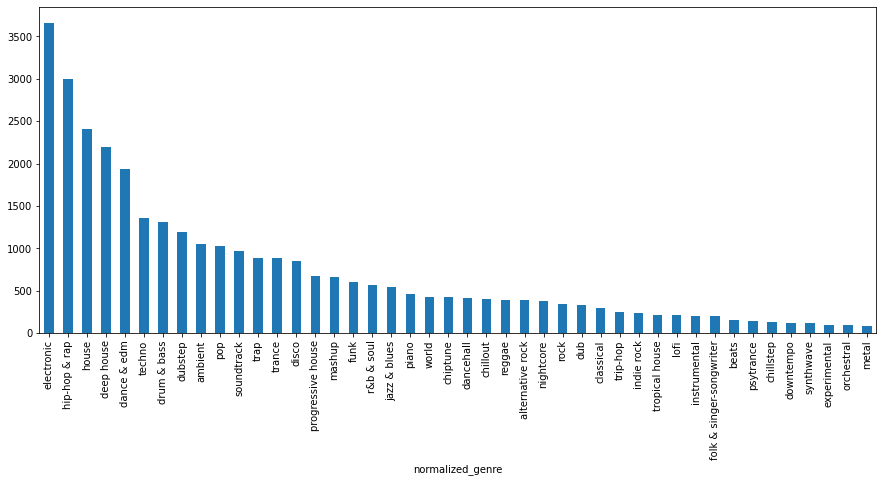

44


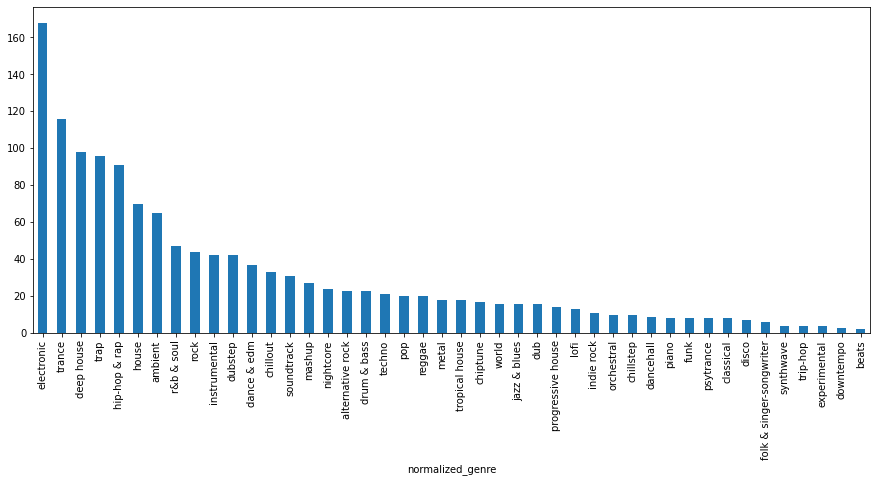

44


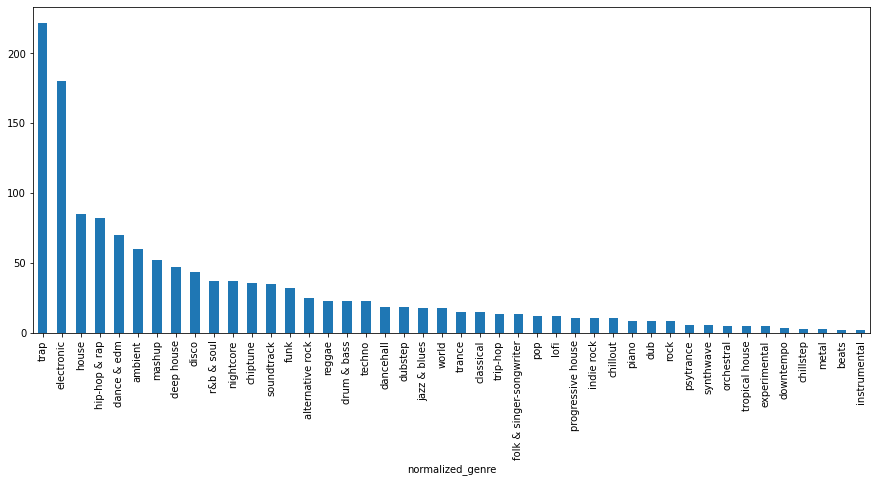

In [15]:
for split in ['train', 'dev', 'test']:
    genres = df[df['scdata_split'] == split] \
        .groupby('normalized_genre')['normalized_genre'] \
        .size() \
        .sort_values(ascending=False)
    print(len(genres))
    
    genres.plot.bar(figsize=(15,6))
    plt.show()